In [89]:
# Load the "autoreload" extension so that code can change
%load_ext autoreload

# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
import tensorflow as tf

In [91]:
from src.models.seq2seq import SeqModel
from src.models.tf_dataset_loader import load_from_txt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from src.data.word_utils import Vocab
# Used to get the graph
from tensorflow.python.keras import backend as K
import os

In [92]:
vocab = Vocab('../data/processed/vocab_pp.json')

In [93]:
model_params = {
    'depth': 1,
    'encoder_units': 40, 
    'vocab_size': len(vocab),
    'use_embedding_layer': False,
    'encoder_input_shape': (128, 300),
    'decoder_input_shape': (129, 300),
    'batch_size': None
}
seq_model = SeqModel()
seq_model.build_model(**model_params)
seq_model.compile_model()
seq_model.model.summary()

Model: "model_48"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 128, 300)]   0                                            
__________________________________________________________________________________________________
decoder_input (InputLayer)      [(None, 129, 300)]   0                                            
__________________________________________________________________________________________________
encoder_lstm-1 (LSTM)           [(None, 128, 40), (N 54560       encoder_input[0][0]              
__________________________________________________________________________________________________
decoder_lstm-1 (LSTM)           [(None, 129, 40), (N 54560       decoder_input[0][0]              
                                                                 encoder_lstm-1[0][1]      

### Visualize with plot model

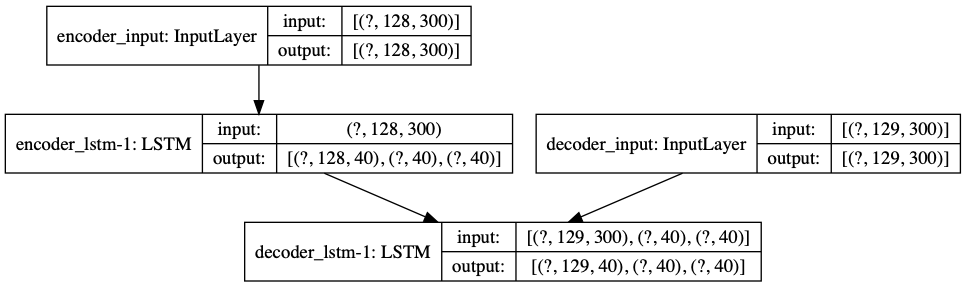

In [94]:
plot_model(seq_model.model, show_shapes=True, to_file='full_model.png')

In [95]:
plot_model(seq_model.encoder_model, to_file='enocder_model.png', show_shapes=True)

AttributeError: 'SeqModel' object has no attribute 'encoder_model'

In [96]:
plot_model(seq_model.decoder_model, to_file = 'decoder_model.png', show_shapes=True)

AttributeError: 'SeqModel' object has no attribute 'decoder_model'

### Visualize with tensorboard
To visualize with tensorboard train the model for one batch of one epoch

In [97]:
logdir = '../models/logs/exp00'
if os.path.exists(logdir):
    !rm -r $logdir

In [98]:
dataset = load_from_txt('../data/processed/train/strings_X.txt',
                        '../data/processed/train/strings_Y.txt',
                        '../data/processed/short-vectors.bin',
                        '../data/processed/vocab_pp.json')

Loaded word2vec mapping
Created tf.data.Dataset


In [101]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
callbacks = [tensorboard_callback]
seq_model.model.fit(dataset, steps_per_epoch=1, epochs=1, callbacks=callbacks)

ValueError: in converted code:

    /Users/edwardrees/opt/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py:677 map_fn
        batch_size=None)
    /Users/edwardrees/opt/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py:2410 _standardize_tensors
        exception_prefix='input')
    /Users/edwardrees/opt/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_utils.py:526 standardize_input_data
        standardize_single_array(x, shape) for (x, shape) in zip(data, shapes)
    /Users/edwardrees/opt/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_utils.py:526 <listcomp>
        standardize_single_array(x, shape) for (x, shape) in zip(data, shapes)
    /Users/edwardrees/opt/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_utils.py:451 standardize_single_array
        if (x.shape is not None and len(x.shape) == 1 and
    /Users/edwardrees/opt/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_shape.py:822 __len__
        raise ValueError("Cannot take the length of shape with unknown rank.")

    ValueError: Cannot take the length of shape with unknown rank.


## %load_ext tensorboard

In [13]:
%tensorboard --logdir $logdir

Reusing TensorBoard on port 6006 (pid 4382), started 11:44:22 ago. (Use '!kill 4382' to kill it.)